# 로지스틱 회귀(Logistic Regression)

* 선형 회귀 방식을 분류에 적용한 알고리즘입니다. (특히, 이진분류)
* 즉, 로지스틱 회귀는 **분류**에 사용됩니다. 
* "S"자 모양의 곡선으로 계산하는 시그모이드 함수(Sigmoid Function)을 사용해서, 분류하는 모델입니다.
* 로지스틱 회귀는 정확히 0 또는 1을 예측하는 대신, 확률(0과1사이의 값)을 생성해서 0과 1을 분류하는 예측 모델
* 로지스틱 회귀에서 예측은 **예측 확률**을 의미합니다. 
* 예측 확률이 0.5 이상이면 1로, 0.5 이하이면 0으로 예측합니다. 


* 로지스틱 회귀는 가볍고 빠르지만, 이진 분류 예측 성능도 뛰어납니다. 
* 이때문에 로지스틱 회귀를 이진 분류의 기본 모델로 사용하는 경우가 많습니다. 

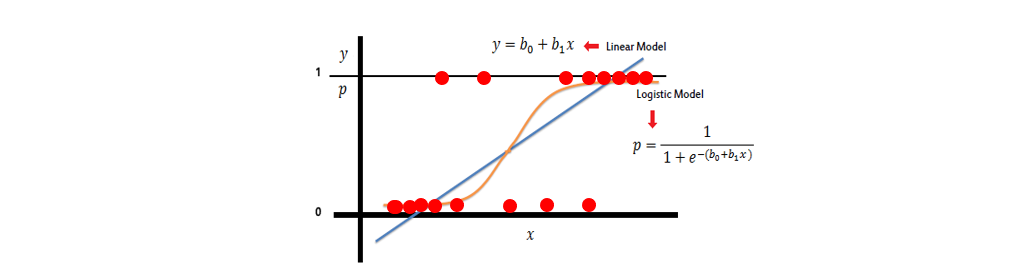

**[참고]**

* 예측을 한다는 것은 선형방정식을 찾는 것입니다. $y=ax + b$ 
* 선형방정식을 찾는다는 것은 기울기 계수인 $a$를 찾는 것입니다. 
* 입력데이터 $x$는 실수 전체가 대상이고, 출력 $y$ 또한 실수 전체가 대상이 됩니다. 
* 그런데 분류에서 우리가 원하는 것은
* 출력이 0 또는 1로 나오는 형태여야 한다는 것이다. 
* 입력이 어떤 값이 들어가더라도 출력 $y$가 0 또는 1 사이의 값만 존재하도록 만들어야 하는데.....
* 이렇게 만들 수 있는 함수가 어디없을까? 하고 수학자,통계학자 등등이 찾아보니
* 시그모이드 함수가 그런 특성을 가지고 있는게 아닌가...
* 로지스틱회귀 클래스에는 시그모이드 함수가 코드로 구현되어 있습니다. 

**[사이킷런 클래스]**

* LogisticRegression()클래스를 지원합니다. 
* 주요 하이퍼파라미터
    * **penalty**: 규제(Regularization)를 의미합니다. l1, l2(기본) 
    * **C**: 규제강도를 조절하는 alpha값의 역수, $C=1/alpha$ C값이 작을수록 규제 강도가 큽니다.


---

## 데이터 로딩

In [ ]:
## 코랩을 사용할 때
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

#현재 작업 위치 이동
#띄어쓰기에 \붙일 것
%cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/02.멀티캠퍼스

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

#위스콘신 유방암 데이터
cancer = load_breast_cancer()

#내장 데이터 셋 데이터프레임으로 만듬
cancerDF = pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
cancerDF['target'] = cancer.target

In [ ]:
cancerDF.head()

In [ ]:
#데이터 요약정보


In [ ]:
#레이블 level확인




In [ ]:
#히스토그램


In [ ]:
#통계정보 확인


## 데이터 전처리

In [ ]:
from sklearn.preprocessing import StandardScaler

#로지스틱회귀의 경우 StandardScaler로 진행해주는 것이 좋다. 
# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환





In [ ]:
# StandardScaler 적용 후 데이터프레임으로 만듬


In [ ]:
#통계 요약 정보


## 데이터 세트 준비

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#데이터 분할
X_train , X_test, y_train , y_test = train_test_split(   ,    , test_size=0.3, random_state=0)

# X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0,stratify=cancer.target)


## 모델 학습:로지스틱회귀

In [ ]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀를 이용하여 학습 및 예측 수행. 







## 평가하기

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))


In [ ]:
get_clf_eval(       ,    )

> * 정확도가 97.6%로 성능이 좋은 편입니다. 
> * 하지만 좀 더 성능을 높여 봅시다.



 

## 하이퍼파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

# - 'newton-cg'   -   ['l2', 'none']
# - 'lbfgs'       -   ['l2', 'none']
# - 'liblinear'   -   ['l1', 'l2']
# - 'sag'         -   ['l2', 'none']
# - 'saga'        -   ['elasticnet', 'l1', 'l2', 'none']

params={'solver':['liblinear'],
        'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 1, 5, 10]} #규제 강도: 높은 강도에서 작은 강도로


grid_clf = GridSearchCV(       , param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(         ,    )

print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, 
                                                  grid_clf.best_score_))

In [ ]:
 #최적의 파라미터를 가진 분류기

 #예측


#평가